In [1]:
import pandas as pd
import seaborn as sns
from glob import glob

In [2]:
result_files = glob('../results/*.csv')
results = pd.DataFrame()

for filepath in result_files:
    data = pd.read_csv(filepath, header=0, index_col=None)
    results = pd.concat([results, data])
    
indexes = results['evaluator'].apply(lambda x: x != 'inverse_square')
results = results.loc[indexes, :]
# results

In [3]:
print("Bernardo, please note that in the paper we should only show f1 score, not accuracy, precision or recall.")
print("Also, in the paper there is no dist or evaluator parameters. All algorithms use euclidian distance, and there is two algorithms, KNN with parameter k, and WN without parameters.")

mean_results = results.groupby(['dataset', 'k_label', 'dist', 'evaluator']).mean()
std_results = results.groupby(['dataset', 'k_label', 'dist', 'evaluator']).std()
std_results = std_results.drop(['cv', 'k', 'n_folds', 'fold'], axis=1)
std_results.columns = ['accuracy_std', 'precision_std', 'recall_std', 'f1_std']

summary = pd.concat([mean_results, std_results], axis=1)

display(summary)

Bernardo, please note that in the paper we should only show f1 score, not accuracy, precision or recall.
Also, in the paper there is no dist or evaluator parameters. All algorithms use euclidian distance, and there is two algorithms, KNN with parameter k, and WN without parameters.


cv       k  \
dataset            k_label dist      evaluator                              
breast_cancer      5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0   217.0   
                                     majority                 2.0   217.0   
                   sqrt(n) euclidean majority                 2.0    14.0   
car_evaluation     5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  1555.0   
                                     majority                 2.0  1555.0   
                   sqrt(n) euclidean majority                 2.0    39.0   
dis                5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  3339.0   
                                     majority                 2.0  3339.0   
                   sqrt(n) euclidean majority                 2.0    57.0   
iris               5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0   117.0   
                                     majority                 2.0   117.0   
                   sqrt(n) euclidean majority                 2.0    10.0   
lupus              5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0    69.0   
                                     majority                 2.0    69.0   
                   sqrt(n) euclidean majority                 2.0     8.0   
spambase           5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  3789.0   
                                     majority                 2.0  3789.0   
                   sqrt(n) euclidean majority                 2.0    61.0   
wine_quality_white 5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  3564.0   
                                     majority                 2.0  3564.0   
                   sqrt(n) euclidean majority                 2.0    59.0   

                                                              n_folds  fold  \
dataset            k_label dist      evaluator                                
breast_cancer      5       euclidean majority                     5.0   2.0   
                   n       euclidean averaged_inverse_square      5.0   2.0   
                                     majority                     5.0   2.0   
                   sqrt(n) euclidean majority                     5.0   2.0   
car_evaluation     5       euclidean majority                    10.0   4.5   
                   n       euclidean averaged_inverse_square     10.0   4.5   
                                     majority                    10.0   4.5   
                   sqrt(n) euclidean majority                    10.0   4.5   
dis                5       euclidean majority                    10.0   4.5   
                   n       euclidean averaged_inverse_square     10.0   4.5   
                                     majority                    10.0   4.5   
                   sqrt(n) euclidean majority                    10.0   4.5   
iris               5       euclidean majority                     5.0   2.0   
                   n       euclidean averaged_inverse_square      5.0   2.0   
                                     majority                     5.0   2.0   
                   sqrt(n) euclidean majority                     5.0   2.0   
lupus              5       euclidean majority                     5.0   2.0   
                   n       euclidean averaged_inverse_square      5.0   2.0   
                                     majority                     5.0   2.0   
                   sqrt(n) euclidean majority                     5.0   2.0   
spambase      

In [22]:
# This table should not be part of the paper, because it enfacizes the best method in each domain...
# But that is not what we want to show. Our algorithm is not the best, it just has comparable performance.

indexes = summary.groupby('dataset').idxmax()['f1']
best_f1 = summary.loc[indexes, :]
best_f1.reset_index()

#print(best_f1.loc[:,['dataset', 'k_label', 'evaluator', 'f1', 'f1_std']])

,dataset,k_label,dist,evaluator,cv,k,n_folds,fold,accuracy,precision,recall,f1,accuracy_std,precision_std,recall_std,f1_std
0,breast_cancer,n,euclidean,averaged_inverse_square,2.0,217.0,5.0,2.0,0.643488,0.409971,0.418382,0.408487,0.050969,0.073687,0.103547,0.072517
1,car_evaluation,5,euclidean,majority,2.0,5.0,10.0,4.5,0.999191,0.999661,0.997913,0.998776,0.002026,0.002397,0.005710,0.003064
2,dis,n,euclidean,majority,2.0,3339.0,10.0,4.5,0.984371,0.984371,1.000000,0.992124,0.001087,0.001087,0.000000,0.000552
3,iris,sqrt(n),euclidean,majority,2.0,10.0,5.0,2.0,0.966023,0.966023,0.966023,0.966023,0.025971,0.025971,0.025971,0.025971
4,lupus,sqrt(n),euclidean,majority,2.0,8.0,5.0,2.0,0.740915,0.729794,0.582857,0.631217,0.093378,0.142491,0.193077,0.158681
5,spambase,5,euclidean,majority,2.0,5.0,10.0,4.5,0.895107,0.887586,0.844301,0.865125,0.016501,0.024227,0.029074,0.021862
6,wine_quality_white,sqrt(n),euclidean,majority,2.0,59.0,10.0,4.5,0.532384,0.532384,0.532384,0.532384,0.023232,0.023232,0.023232,0.023232


In [23]:
# This table should not be part of the paper, because it enfacizes the comparison when k=n...
# Our objetive was to have method comparable against the best values of k, and k=n is not the best usually...
# So it is unfair to we compare it exclusively against majority with k=n.

indexes = summary.loc[pd.IndexSlice[:,'n',:,:], :].groupby('dataset').idxmax()['f1']
best_f1_with_n = summary.loc[indexes, :]
best_f1_with_n

,,,,cv,k,n_folds,fold,accuracy,precision,recall,f1,accuracy_std,precision_std,recall_std,f1_std
dataset,k_label,dist,evaluator,,,,,,,,,,,,
breast_cancer,n,euclidean,averaged_inverse_square,2.0,217.0,5.0,2.0,0.643488,0.409971,0.418382,0.408487,0.050969,0.073687,0.103547,0.072517
car_evaluation,n,euclidean,averaged_inverse_square,2.0,1555.0,10.0,4.5,0.899538,0.771049,1.000000,0.870004,0.025672,0.045263,0.000000,0.028856
dis,n,euclidean,majority,2.0,3339.0,10.0,4.5,0.984371,0.984371,1.000000,0.992124,0.001087,0.001087,0.000000,0.000552
iris,n,euclidean,averaged_inverse_square,2.0,117.0,5.0,2.0,0.953655,0.953655,0.953655,0.953655,0.029581,0.029581,0.029581,0.029581
lupus,n,euclidean,averaged_inverse_square,2.0,69.0,5.0,2.0,0.699085,0.646771,0.634286,0.623867,0.109903,0.153883,0.180136,0.139315
spambase,n,euclidean,averaged_inverse_square,2.0,3789.0,10.0,4.5,0.868504,0.838455,0.831081,0.834285,0.016087,0.023741,0.033827,0.021410
wine_quality_white,n,euclidean,majority,2.0,3564.0,10.0,4.5,0.451401,0.451401,0.451401,0.451401,0.001021,0.001021,0.001021,0.001021


In [6]:
# This table should not be part of the paper because it shows already shown information.

indexes = summary.loc[pd.IndexSlice[:,:,:,'averaged_inverse_square'], :].groupby('dataset').idxmax()['f1']
best_f1_with_is = summary.loc[indexes, :]
best_f1_with_is

,,,,cv,k,n_folds,fold,accuracy,precision,recall,f1,accuracy_std,precision_std,recall_std,f1_std
dataset,k_label,dist,evaluator,,,,,,,,,,,,
breast_cancer,n,euclidean,averaged_inverse_square,2.0,217.0,5.0,2.0,0.643488,0.409971,0.418382,0.408487,0.050969,0.073687,0.103547,0.072517
car_evaluation,n,euclidean,averaged_inverse_square,2.0,1555.0,10.0,4.5,0.899538,0.771049,1.000000,0.870004,0.025672,0.045263,0.000000,0.028856
dis,n,euclidean,averaged_inverse_square,2.0,3339.0,10.0,4.5,0.550580,0.997458,0.544813,0.704254,0.029805,0.003592,0.029769,0.025181
iris,n,euclidean,averaged_inverse_square,2.0,117.0,5.0,2.0,0.953655,0.953655,0.953655,0.953655,0.029581,0.029581,0.029581,0.029581
lupus,n,euclidean,averaged_inverse_square,2.0,69.0,5.0,2.0,0.699085,0.646771,0.634286,0.623867,0.109903,0.153883,0.180136,0.139315
spambase,n,euclidean,averaged_inverse_square,2.0,3789.0,10.0,4.5,0.868504,0.838455,0.831081,0.834285,0.016087,0.023741,0.033827,0.021410
wine_quality_white,n,euclidean,averaged_inverse_square,2.0,3564.0,10.0,4.5,0.364858,0.364858,0.364858,0.364858,0.020477,0.020477,0.020477,0.020477


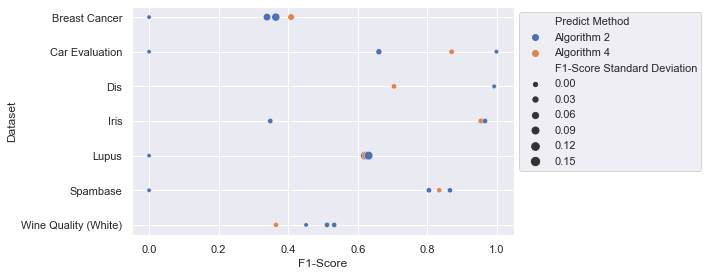

In [101]:
data = summary.reset_index()
data.columns = [col.replace('f1_std', 'F1-Score Standard Deviation').replace('evaluator', 'Predict Method') for col in data.columns.values]
data = data.replace('majority', 'Algorithm 2')
data = data.replace('averaged_inverse_square', 'Algorithm 4')
data = data.replace('breast_cancer', 'Breast Cancer')
data = data.replace('car_evaluation', 'Car Evaluation')
data = data.replace('dis', 'Dis')
data = data.replace('iris', 'Iris')
data = data.replace('lupus', 'Lupus')
data = data.replace('spambase', 'Spambase')
data = data.replace('wine_quality_white', 'Wine Quality (White)')

sns.set(rc={"figure.figsize":(10, 4)}) #width=8, height=4
ax = sns.scatterplot(data=data, x='f1', y='dataset', size='F1-Score Standard Deviation', hue='Predict Method')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel('Dataset')
ax.set_xlabel('F1-Score')
plt.tight_layout()
plt.savefig('dataset_f1.pdf')

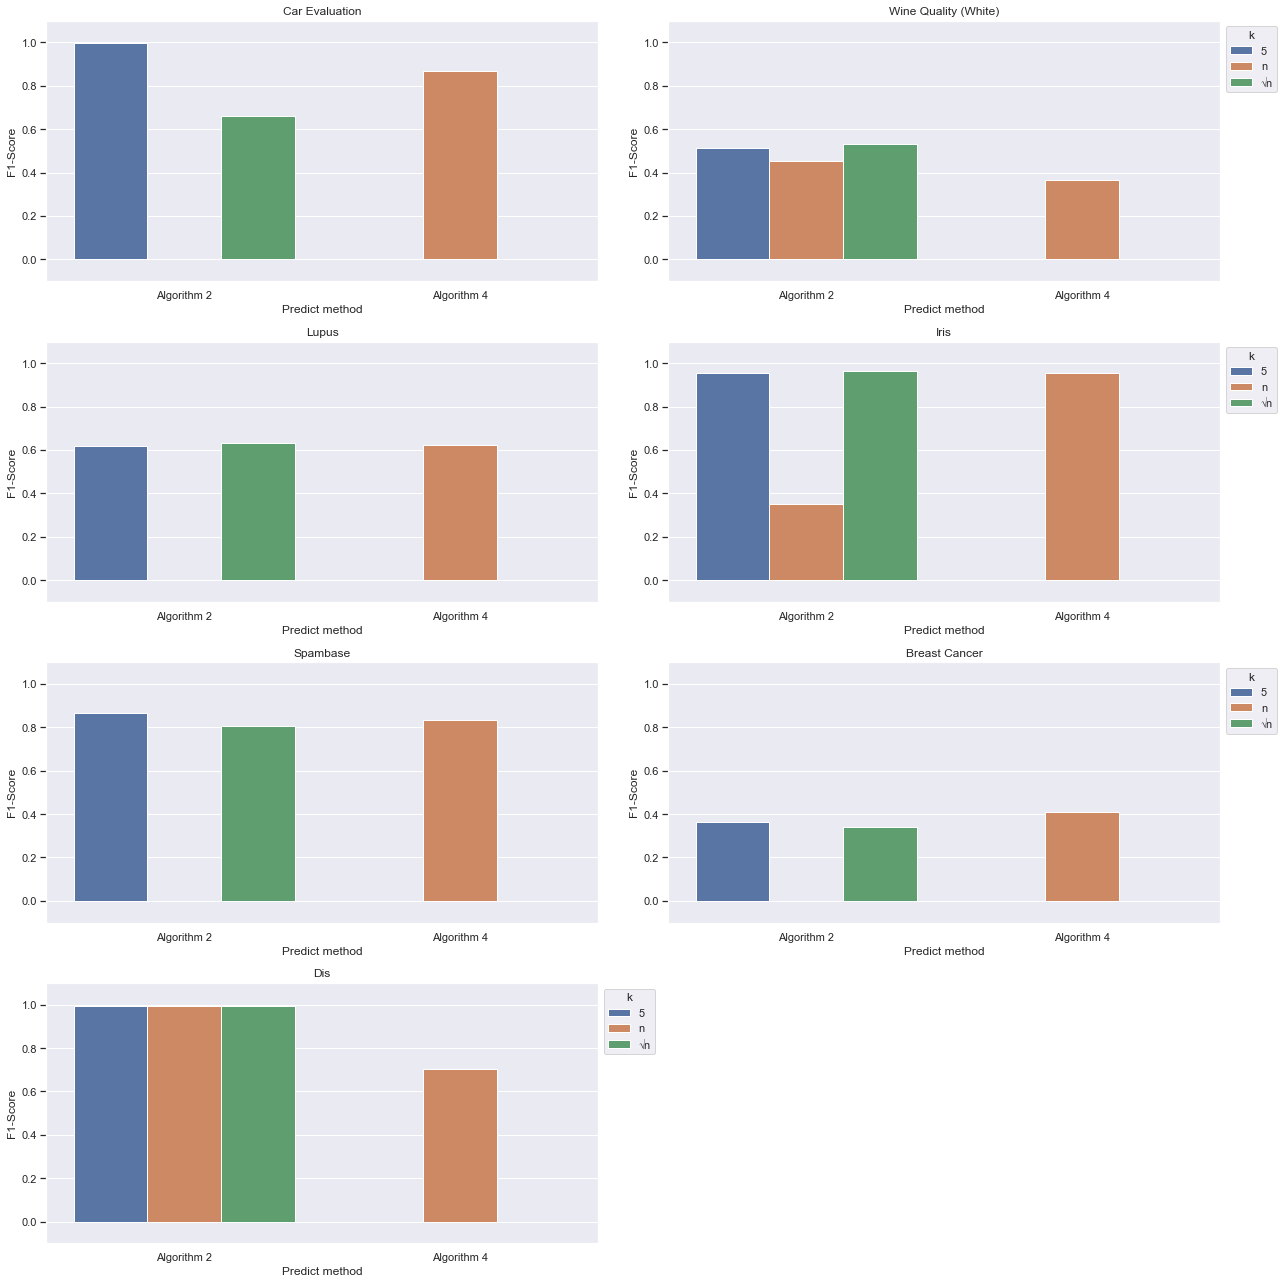

In [99]:
# I was thinking, Bernardo...
# These graphs are also not necessary, and neither are good: I don't like the bars ordering (sqrt n should be in the middle), also don't like the titles appearences: namely, the title of both axes (showing their units), and the domain name.
# I think we should keep only the scatter-plot in the paper
# - Frederico

import matplotlib.pyplot as plt
from math import log, inf

def lli0(x):
    if x == 0:
        return -inf
    if x == 1:
        return inf
    return log(x) - log(1 - x)

ticks = [0.01, 0.1, 0.5, 0.9, 0.99]
minor_ticks = [0.05, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.95]

sns.set_style("whitegrid")
sns.set(rc={"ytick.left" : True})

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# data['lli0f1'] = data['f1'].apply(lli0)
# data['lli0f1'] -= lli0(min(ticks))

fig, axes = plt.subplots(4, 2, figsize=(18, 18))
fig.subplots_adjust(hspace=.4)

k = 0
datasets = list(set(data['dataset']))
data = data.replace('sqrt(n)', '√n')

for i in range(4):
    for j in range(2):
        if k < len(datasets):
            dt = datasets[k]
            indexes = data['dataset'].apply(lambda d: d == dt)
            
            axes[i, j].set_title(dt)
            g = sns.barplot(ax=axes[i, j], data=data.loc[indexes, :], x='evaluator', y='f1', hue='k_label') #, bottom=lli0(min(ticks)))
            axes[i, j].set(ylim=(-0.1, 1.1))
            axes[i, j].set_xlabel('Predict method')
            axes[i, j].set_ylabel('F1-Score')
#             axes[i, j].set_yticks(ticks=list(map(lli0, ticks)))
#             axes[i, j].set_yticks(ticks=list(map(lli0, minor_ticks)), minor = True)

            if j == 1 or i == 3:
                axes[i, j].legend(title="k", loc=2, bbox_to_anchor=(1,1))
            else:
                axes[i, j].legend([],[], frameon=False)
                
            k += 1
        else:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.savefig('pm_f1_k_dt.pdf')